In [1]:
import numpy as np
import scipy.stats as st
import sklearn.linear_model as lm
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# モデルの背後にある決定論的非線形関数を定義
f = lambda x: np.exp(3 * x)

In [3]:
x_tr = np.linspace(0., 2, 200)
y_tr = f(x_tr)

In [4]:
x = np.array([0, .1, .2, .5, .8, .9, 1])
y = f(x) + np.random.randn(len(x))

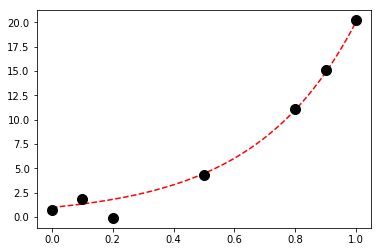

In [5]:
plt.plot(x_tr[:100], y_tr[:100], '--r')
plt.plot(x, y, 'ok', ms=10)

In [6]:
# create the model
lr = lm.LinearRegression()
# train the model on a training dataset
lr.fit(x[:, np.newaxis], y) # xを縦にする
# predicts points with trained model!
y_lr = lr.predict(x_tr[:, np.newaxis])

/usr/local/lib/python3.6/site-packages/scipy/linalg/basic.py:1018: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


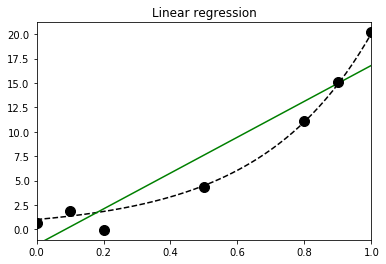

In [7]:
plt.plot(x_tr, y_tr, '--k')
plt.plot(x_tr, y_lr, 'g')
plt.plot(x, y, 'ok', ms=10)
plt.xlim(0,1)
plt.ylim(y.min()-1, y.max()+1)
plt.title('Linear regression')

26.90 -8.50 0.00
413.46 -1013.61 858.31 -262.39 23.78 0.00


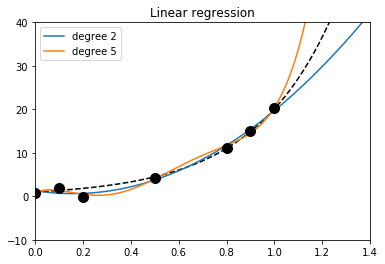

In [8]:
lrp = lm.LinearRegression()
plt.plot(x_tr, y_tr, '--k')
for deg in [2, 5]:
    lrp.fit(np.vander(x, deg + 1), y)
    #.vander -> https://docs.scipy.org/doc/numpy/reference/generated/numpy.vander.html
    # [[ 0.    0.    1.  ]
    #  [ 0.01  0.1   1.  ]
    #  [ 0.04  0.2   1.  ]
    #  [ 0.25  0.5   1.  ]
    #  [ 0.64  0.8   1.  ]
    #  [ 0.81  0.9   1.  ]
    #  [ 1.    1.    1.  ]]
    y_lrp = lrp.predict(np.vander(x_tr, deg + 1))
    plt.plot(x_tr, y_lrp,
             label='degree ' + str(deg))
    plt.legend(loc=2) #locは1-4で右上、左上、左下、右下の順. max 10.
    plt.xlim(0, 1.4)
    plt.ylim(-10, 40)
    # print the model's coefficients. モデルの係数
    print(' '.join(['%.2f' % c for c in lrp.coef_]))
plt.plot(x, y, 'ok', ms=10)
plt.title('Linear regression')

12.50 5.37 0.00
3.68 3.96 4.23 4.29 3.22 0.00


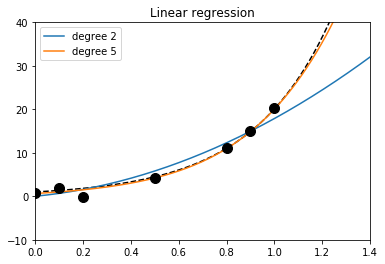

In [9]:
# リッジ回避
# 過学習を防ぐ。
# 損失関数に正規加工を加えることである種の構造をモデルに組み込む。
# 交差検証Ridge RidgeCV
lrp = lm.RidgeCV()
plt.plot(x_tr, y_tr, '--k')
for deg in [2, 5]:
    lrp.fit(np.vander(x, deg + 1), y)
    y_lrp = lrp.predict(np.vander(x_tr, deg + 1))
    plt.plot(x_tr, y_lrp,
             label='degree ' + str(deg))
    plt.legend(loc=2)
    plt.xlim(0, 1.4)
    plt.ylim(-10, 40)
    # print the model's coefficients. モデルの係数
    print(' '.join(['%.2f' % c for c in lrp.coef_]))
plt.plot(x, y, 'ok', ms=10)
plt.title('Linear regression')